# Linear Regression
You should build a machine learning pipeline using a linear regression model. In particular, you should do the following:
- Load the `housing` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a linear regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [4]:
import pandas as pd
import sklearn as sk

df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/housing.csv')
df.head()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [5]:
df.describe()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.00000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,272.00000,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,157.47222,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,0.00000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.00000,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,272.00000,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,408.00000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,544.00000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [6]:
df.dtypes

,0
id,int64
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
stories.1,int64
guestroom,int64
basement,int64
hotwaterheating,int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                545 non-null    float64
 1   price             545 non-null    int64  
 2   area              545 non-null    float64
 3   bedrooms          545 non-null    float64
 4   bathrooms         545 non-null    float64
 5   stories           545 non-null    float64
 6   stories.1         545 non-null    float64
 7   guestroom         545 non-null    float64
 8   basement          545 non-null    float64
 9   hotwaterheating   545 non-null    float64
 10  airconditioning   545 non-null    float64
 11  parking           545 non-null    float64
 12  prefarea          545 non-null    float64
 13  furnishingstatus  545 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 59.7 KB


In [7]:
df.isnull().sum()

,0
id,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
stories.1,0
guestroom,0
basement,0
hotwaterheating,0


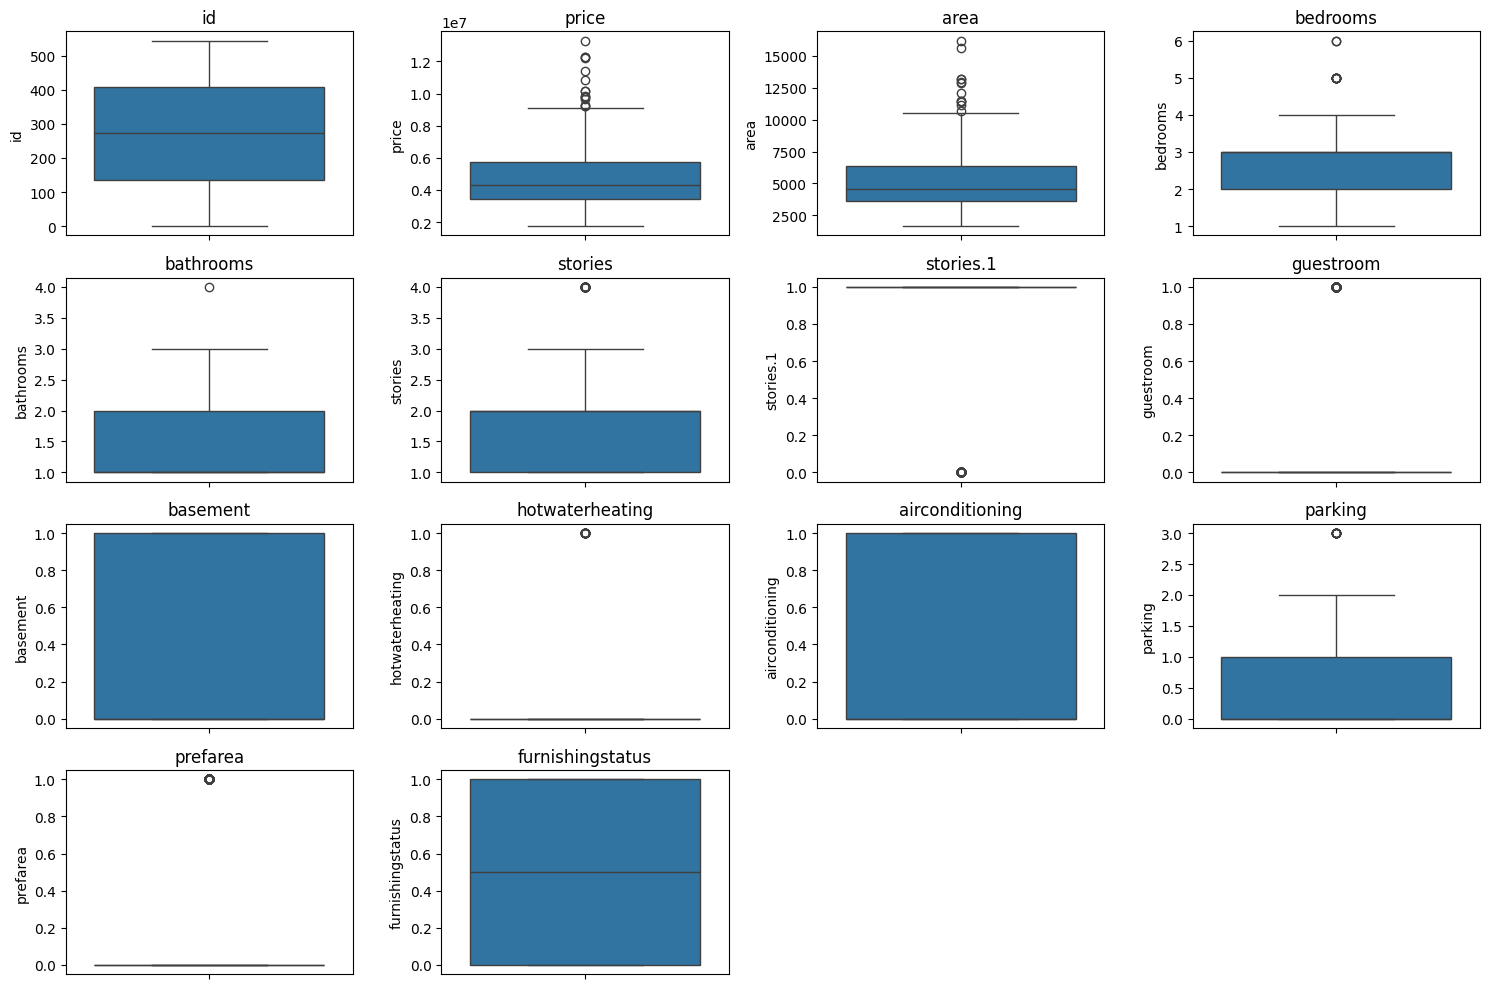

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#Interesting but not really valuable, same information could be extract from histograms

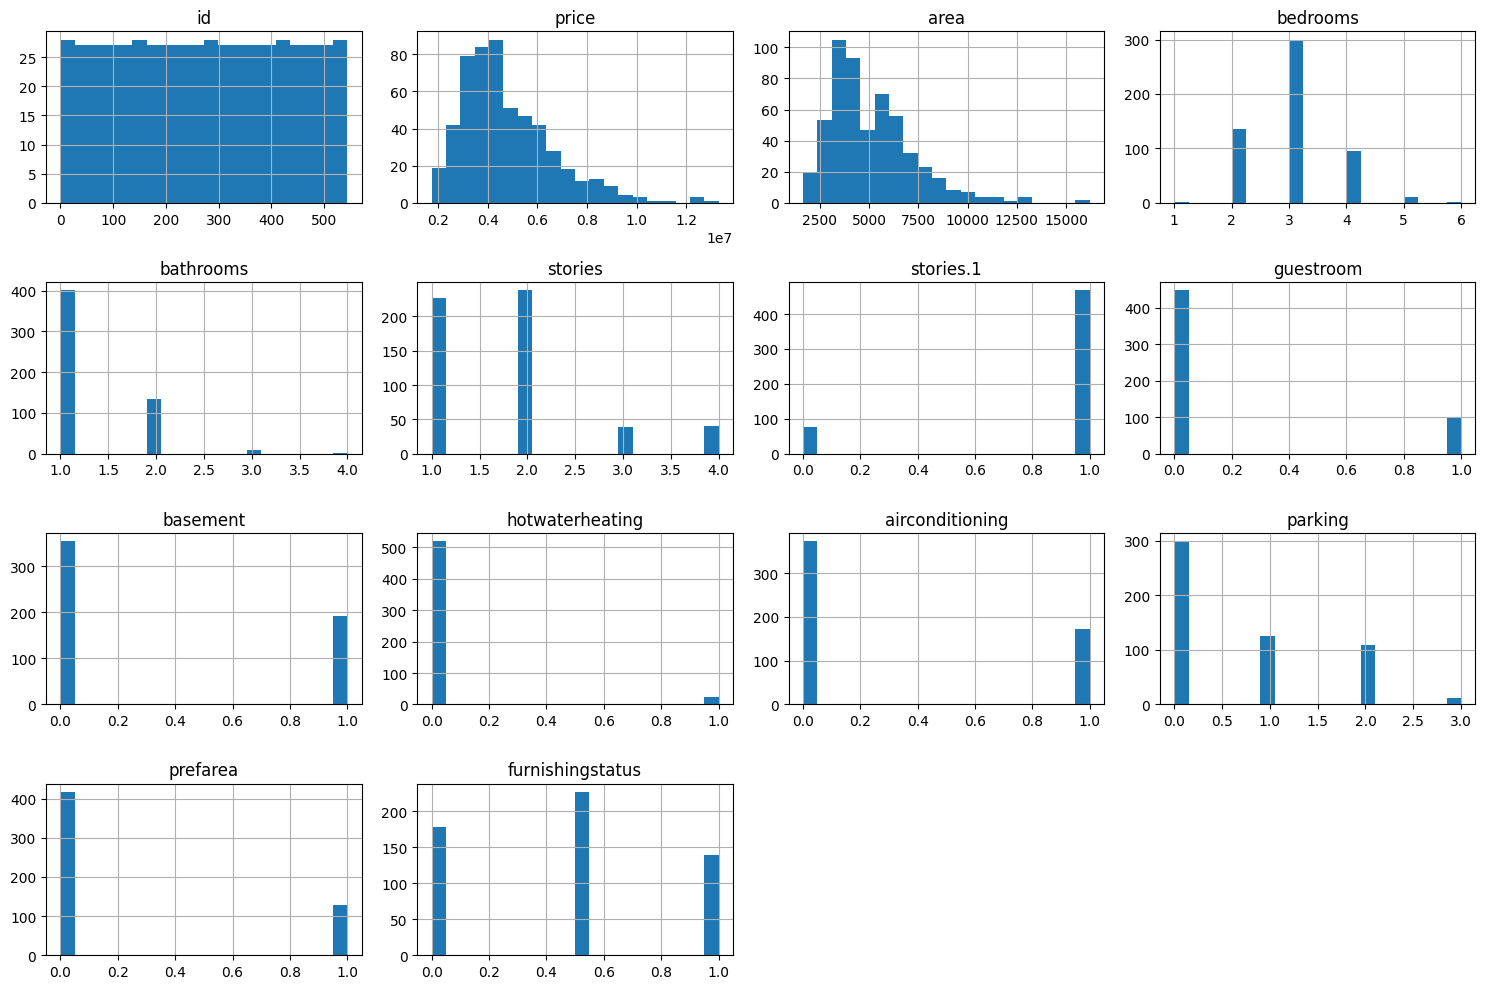

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to normalize (excluding the target variable 'price')
numerical_cols_to_normalize = numerical_cols.drop('price')

scaler = StandardScaler()

df[numerical_cols_to_normalize] = scaler.fit_transform(df[numerical_cols_to_normalize])

display(df.head())

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,-1.728876,13300000,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,1.406286
1,-1.722519,12250000,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,-1.716163,12250000,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.091662
3,-1.709807,12215000,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,-1.703451,11410000,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286


In [12]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(['price', 'id'], axis=1) # Drop 'price' and 'id'
y = df['price']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (436, 12) (436,)
Testing set shape (X_test, y_test): (109, 12) (109,)


In [14]:
X_train.head()

,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,0.391790,0.047278,1.421812,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,0.355976,-0.554035,1.406286
93,0.945257,0.047278,1.421812,-0.929397,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,-0.554035,0.091662
335,-0.615521,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286
412,-1.171756,0.047278,-0.570187,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.805741,1.804941,-1.222962
471,-0.645962,0.047278,-0.570187,0.224410,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.222962


In [15]:
# Initialize the Linear Regression model
model = sk.linear_model.LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 979679.6912959907
Mean Squared Error (MSE): 1771751116594.04
Root Mean Squared Error (RMSE): 1331071.4167895124
R-squared (R2): 0.6494754192267793


Check if the results change between normalizing and not